<a href="https://colab.research.google.com/github/medhaja/Cola-Crisp-Classification/blob/master/classify_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import random

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
!unzip "/content/gdrive/My Drive/data.zip"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Archive:  /content/gdrive/My Drive/data.zip
replace data/test/cola/cola (287).JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
trainFolder = "data/train"
validFolder = "data/valid"
testFolder = "data/test"
trainSet = ImageDataGenerator(rotation_range=(random.randint(10,50)),width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,zoom_range=0.1,channel_shift_range=(random.randint(10,20)),horizontal_flip=True).flow_from_directory(trainFolder, target_size=(224, 224), classes=["cola", "crisp"], batch_size=16)
validSet = ImageDataGenerator(rotation_range=(random.randint(10,50)),width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,zoom_range=0.1,channel_shift_range=(random.randint(10,20)),horizontal_flip=True).flow_from_directory(validFolder, target_size=(224, 224), classes=["cola", "crisp"], batch_size=4)
testSet = ImageDataGenerator(rotation_range=(random.randint(10,50)),width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,zoom_range=0.1,channel_shift_range=(random.randint(10,20)),horizontal_flip=True).flow_from_directory(testFolder, target_size=(224, 224), classes=["cola", "crisp"], batch_size=10)

Found 559 images belonging to 2 classes.
Found 36 images belonging to 2 classes.
Found 52 images belonging to 2 classes.


In [0]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims)%2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize = 16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
        plt.show()

In [0]:
imgs, labels = next(trainSet)

In [0]:
#plots(imgs, titles=labels)

In [5]:
v_model=keras.applications.vgg16.VGG16()

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model=Sequential()
for layer in v_model.layers[:-1]:
    model.add(layer)

In [0]:
for layer in model.layers:
    layer.trainable=False

In [8]:
from keras.layers import Dense, Dropout, Activation
model.add(Dense(128,activation="softmax"))
model.add(Dropout(0.5))
model.add(Dense(64,activation="softmax"))
#model.add(Dropout(0.5))
model.add(Dense(2,activation="softmax"))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [0]:
model.compile(Adam(lr=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

In [14]:
model.fit_generator(trainSet, steps_per_epoch=40, validation_data=validSet, validation_steps=8, epochs=8, verbose=2,samples_per_epoch=(len(trainSet)*10))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=21, validation_data=<keras_pre..., validation_steps=8, epochs=8, verbose=2)`
  """Entry point for launching an IPython kernel.


Epoch 1/8
 - 46s - loss: 0.6437 - acc: 0.7589 - val_loss: 0.6462 - val_acc: 0.9062
Epoch 2/8
 - 46s - loss: 0.6340 - acc: 0.7794 - val_loss: 0.6332 - val_acc: 0.9375
Epoch 3/8
 - 45s - loss: 0.6275 - acc: 0.7381 - val_loss: 0.6348 - val_acc: 0.8750
Epoch 4/8
 - 44s - loss: 0.6201 - acc: 0.7526 - val_loss: 0.6160 - val_acc: 0.9375
Epoch 5/8
 - 44s - loss: 0.6160 - acc: 0.7522 - val_loss: 0.5963 - val_acc: 1.0000
Epoch 6/8
 - 44s - loss: 0.6029 - acc: 0.7619 - val_loss: 0.5954 - val_acc: 0.9375
Epoch 7/8
 - 45s - loss: 0.5964 - acc: 0.7224 - val_loss: 0.5795 - val_acc: 0.9688
Epoch 8/8
 - 44s - loss: 0.5942 - acc: 0.7381 - val_loss: 0.5897 - val_acc: 0.9062


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


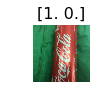

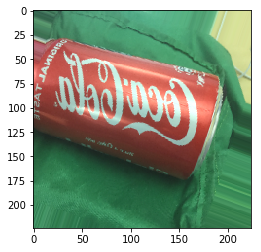

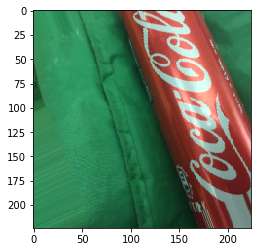

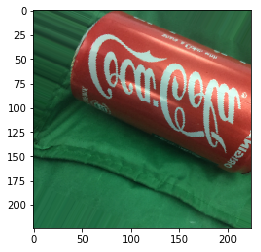

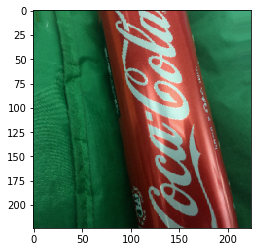

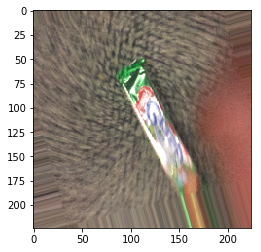

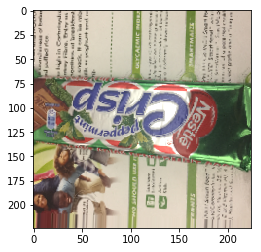

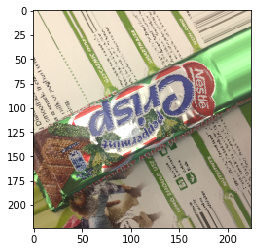

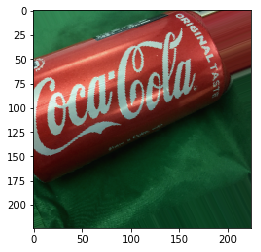

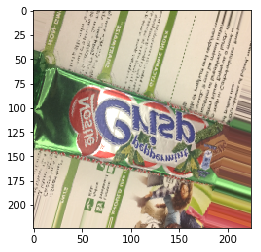

In [19]:
test_imgs,test_labels=next(testSet)
plots(test_imgs,titles=test_labels)
test_labels=test_labels[:,0]

In [20]:
predict=model.predict_generator(testSet,steps=1,verbose=0)
cm=confusion_matrix(test_labels,np.round(predict[:,0]))
cm
print("true positive(True:Cola Predict:Cola)\t"+str(cm[0][0])+"\tFasle Positive(true:cola predict:crisp)\t"+str(cm[0][1])+"\n")
print("false neg(True:Crisp Predict:Cola)\t"+str(cm[1][0])+"\tTrue neg(True:Crisp Predict:Crisp)\t"+str(cm[1][1])+"\n")
print("Accuracy:"+str((cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])))

true positive(True:Cola Predict:Cola)	2	Fasle Positive(true:cola predict:crisp)	2

false neg(True:Crisp Predict:Cola)	0	True neg(True:Crisp Predict:Crisp)	6

Accuracy:0.8
